Defining properties of the 2DOF systems of two springs in series

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m1 = 1.
m2 = 1.
k1 = 1.e3
k2 = 1.

M = np.array([[m1, 0],
              [0, m2]])

K = np.array([[k1+k2, -k2],
              [-k2, k2]])

C = np.zeros_like(M)

Calculating initial acceleration

In [2]:
u0 = np.array([1, 10])
v0 = np.zeros(2)

tmax = 25
t = np.linspace(0, tmax, 100) # Delta t = 25/100
dt = t[1] - t[0]

u = np.zeros((2, t.shape[0]))
v = np.zeros((2, t.shape[0]))
a = np.zeros((2, t.shape[0]))

u[:, 0] = u0
v[:, 0] = v0
a[:, 0] = np.linalg.solve(M, - C @ v0 - K @ u0)

Direct single-step method

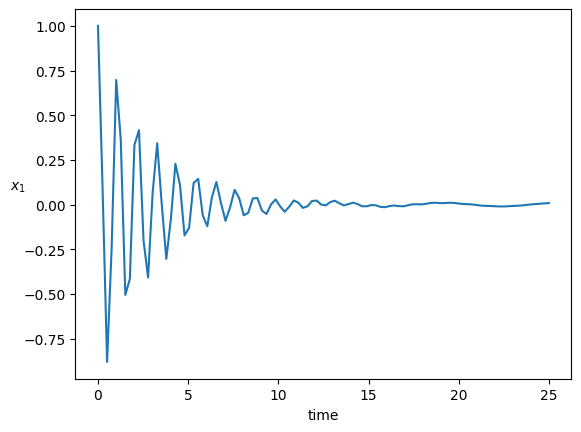

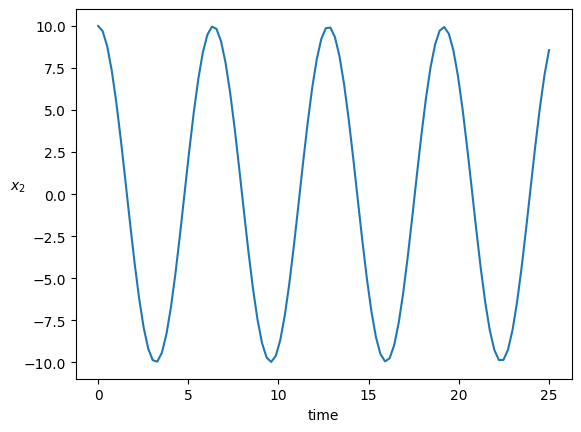

In [3]:
beta = 0.6
gamma = 0.6
alpham = 0.1
alphaf = 0.2

for i in range(0, t.shape[0]-1):
    B = (1 - alpham)*M + gamma*dt*(1 - alphaf)*C + beta*dt**2*(1 - alphaf)*K
    
    # predictor
    uP = u[:, i] + dt*v[:, i] + dt**2/2*(1 - 2*beta)*a[:, i]
    vP = v[:, i] + (1 - gamma)*dt*a[:, i]
    
    b = - (1 - alphaf)*C@vP - (1 - alphaf)*K@uP - alphaf*K@u[:, i] - alphaf*C@v[:, i] - alpham*M@a[:, i]
    
    a[:, i+1] = np.linalg.solve(B, b)
    
    # corrector
    u[:, i+1] = uP + beta*dt**2*a[:, i+1]
    v[:, i+1] = vP + gamma*dt*a[:, i+1]

x1 = u[0, :]
x2 = u[1, :]
plt.figure()
plt.plot(t, x1)
plt.xlabel('time')
plt.ylabel('$x_1$', rotation='horizontal')
plt.show()

plt.figure()
plt.plot(t, x2)
plt.xlabel('time')
plt.ylabel('$x_2$', rotation='horizontal')
plt.show()
